In [1]:
from google.colab import files
uploaded = files.upload()

Saving employee_survey_data.csv to employee_survey_data.csv
Saving general_data.csv to general_data.csv
Saving in_time.csv to in_time.csv
Saving manager_survey_data.csv to manager_survey_data.csv
Saving out_time.csv to out_time.csv


In [25]:
import pandas as pd
import io

in_time_df = pd.read_csv(io.BytesIO(uploaded['in_time.csv']))
manager_survey_data_df = pd.read_csv(io.BytesIO(uploaded['manager_survey_data.csv']))
out_time_df = pd.read_csv(io.BytesIO(uploaded['out_time.csv']))
employee_survey_data_df = pd.read_csv(io.BytesIO(uploaded['employee_survey_data.csv']))
general_data_df = pd.read_csv(io.BytesIO(uploaded['general_data.csv']))

In [26]:
print(employee_survey_data_df.head())
print(general_data_df.head())
print(in_time_df.head())
print(manager_survey_data_df.head())
print(out_time_df.head())

   EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0
3           4                      4.0              4.0              3.0
4           5                      4.0              1.0              3.0
   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0   

In [27]:
# Q1
import pandas as pd

# Load the dataset
general_data = pd.read_csv('general_data.csv')

# Filter the dataset for employees aged 30 and above
filtered_data = general_data[general_data['Age'] >= 30]
print(filtered_data)

      Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4402   37       Yes  Travel_Frequently                   Sales   
4403   39        No  Travel_Frequently  Research & Development   
4405   42        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                    6          2  Life Sciences              1           1   
1                   10          1  Life Sciences 

In [28]:
#Q2
pivot_table = general_data.pivot_table(values='MonthlyIncome', index='JobRole', aggfunc='mean')
print(pivot_table)

                           MonthlyIncome
JobRole                                 
Healthcare Representative   60983.740458
Human Resources             58528.076923
Laboratory Technician       66314.054054
Manager                     63395.882353
Manufacturing Director      69183.724138
Research Director           65473.125000
Research Scientist          64975.684932
Sales Executive             65186.687117
Sales Representative        65370.963855


In [29]:
#Q3
average_income = general_data['MonthlyIncome'].mean()
general_data['AboveAverageIncome'] = general_data['MonthlyIncome'] > average_income
print(general_data[['EmployeeID', 'MonthlyIncome', 'AboveAverageIncome']])

      EmployeeID  MonthlyIncome  AboveAverageIncome
0              1         131160                True
1              2          41890               False
2              3         193280                True
3              4          83210                True
4              5          23420               False
...          ...            ...                 ...
4405        4406          60290               False
4406        4407          26790               False
4407        4408          37020               False
4408        4409          23980               False
4409        4410          54680               False

[4410 rows x 3 columns]


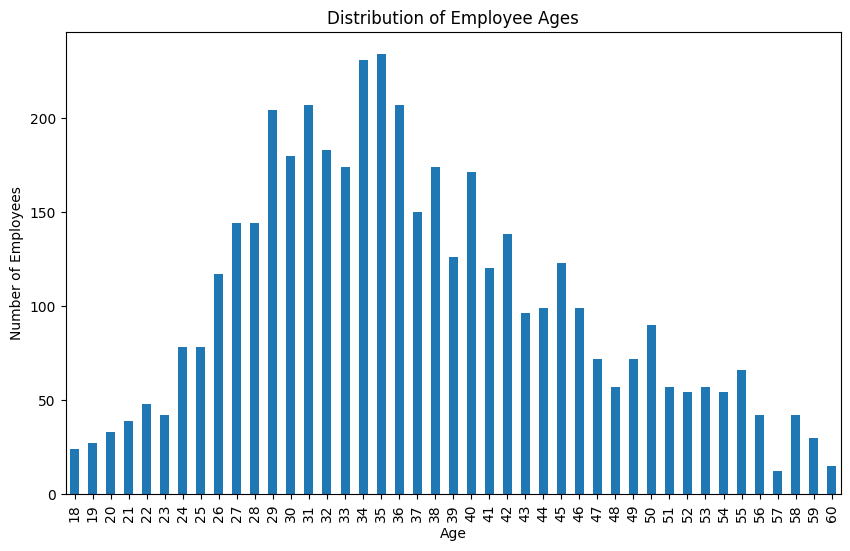

In [30]:
#Q4
import matplotlib.pyplot as plt

# Plotting the distribution of employee ages
plt.figure(figsize=(10, 6))
general_data['Age'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employee Ages')
plt.show()

In [31]:
#Q5
# Identify missing or inconsistent values
missing_departments = general_data['Department'].isnull().sum()
print(f"Missing Department values: {missing_departments}")

# Drop rows with missing values in the Department column
cleaned_data = general_data.dropna(subset=['Department'])
print(cleaned_data)

Missing Department values: 0
      Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                    6          2  Life Sciences              1           1   
1                   

In [32]:
#Q8
pivot_table = general_data.pivot_table(values='EmployeeID', index='MaritalStatus', columns='Department', aggfunc='count')
print(pivot_table)

Department     Human Resources  Research & Development  Sales
MaritalStatus                                                
Divorced                    21                     621    339
Married                     96                    1350    573
Single                      72                     912    426


In [33]:
#Q15
filtered_data = general_data[general_data['JobLevel'] >= 3]
total_income_per_department = filtered_data.groupby('Department')['MonthlyIncome'].sum()
print(total_income_per_department)

Department
Human Resources            3259140
Research & Development    53502900
Sales                     22974330
Name: MonthlyIncome, dtype: int64


In [34]:
#Q16
general_data['IncreasedIncome'] = general_data['MonthlyIncome'] * (1 + 0.1 * general_data['PercentSalaryHike'])
print(general_data[['EmployeeID', 'MonthlyIncome', 'PercentSalaryHike', 'IncreasedIncome']])

      EmployeeID  MonthlyIncome  PercentSalaryHike  IncreasedIncome
0              1         131160                 11         275436.0
1              2          41890                 23         138237.0
2              3         193280                 15         483200.0
3              4          83210                 11         174741.0
4              5          23420                 12          51524.0
...          ...            ...                ...              ...
4405        4406          60290                 17         162783.0
4406        4407          26790                 15          66975.0
4407        4408          37020                 20         111060.0
4408        4409          23980                 14          57552.0
4409        4410          54680                 12         120296.0

[4410 rows x 4 columns]
